## Additional training functions

[`train`](/train.html#train) provides a number of extension methods that are added to [`Learner`](/basic_train.html#Learner) (see below for a list and details), along with three simple callbacks:

- [`ShowGraph`](/train.html#ShowGraph)
- [`GradientClipping`](/train.html#GradientClipping)
- [`BnFreeze`](/train.html#BnFreeze)
- [`AccumulateScheduler`](/train.html#AccumulateScheduler)

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.train import *
from fastai.vision import *


## [`Learner`](/basic_train.html#Learner) extension methods

These methods are automatically added to all [`Learner`](/basic_train.html#Learner) objects created after importing this module. They provide convenient access to a number of callbacks, without requiring them to be manually created.

In [ ]:
show_doc(fit_one_cycle)

<h4 id="fit_one_cycle" class="doc_header"><code>fit_one_cycle</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L14" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#fit_one_cycle-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>fit_one_cycle</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`cyc_len`**:`int`, **`max_lr`**:`Union`\[`float`, `Collection`\[`float`\], `slice`\]=***`slice(None, 0.003, None)`***, **`moms`**:`Point`=***`(0.95, 0.85)`***, **`div_factor`**:`float`=***`25.0`***, **`pct_start`**:`float`=***`0.3`***, **`final_div`**:`float`=***`None`***, **`wd`**:`float`=***`None`***, **`callbacks`**:`Optional`\[`Collection`\[[`Callback`](/callback.html#Callback)\]\]=***`None`***, **`tot_epochs`**:`int`=***`None`***, **`start_epoch`**:`int`=***`None`***)

<div class="collapse" id="fit_one_cycle-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#fit_one_cycle-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>fit_one_cycle</code>:</p><ul><li><code>pytest -sv tests/test_train.py::test_fit_one_cycle</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_train.py#L36" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>fit_one_cycle</code> is used:</p><ul><li><code>pytest -sv tests/test_tabular_train.py::test_empty_cont</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_tabular_train.py#L71" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_text_train.py::test_qrnn_works_if_split_fn_provided</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_text_train.py#L73" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_text_train.py::test_qrnn_works_with_no_split</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_text_train.py#L61" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Fit a model following the 1cycle policy.  

In [ ]:
show_doc(one_cycle_scheduler)

<h4 id="one_cycle_scheduler" class="doc_header"><code>one_cycle_scheduler</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L10" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#one_cycle_scheduler-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>one_cycle_scheduler</code>(**`lr_max`**:`float`, **\*\*`kwargs`**:`Any`) → [`OneCycleScheduler`](/callbacks.one_cycle.html#OneCycleScheduler)

<div class="collapse" id="one_cycle_scheduler-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#one_cycle_scheduler-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>one_cycle_scheduler</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Instantiate a [`OneCycleScheduler`](/callbacks.one_cycle.html#OneCycleScheduler) with `lr_max`.  

See [`OneCycleScheduler`](/callbacks.one_cycle.html#OneCycleScheduler) for details.

In [ ]:
show_doc(lr_find)

<h4 id="lr_find" class="doc_header"><code>lr_find</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L24" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#lr_find-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>lr_find</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`start_lr`**:`Floats`=***`1e-07`***, **`end_lr`**:`Floats`=***`10`***, **`num_it`**:`int`=***`100`***, **`stop_div`**:`bool`=***`True`***, **`wd`**:`float`=***`None`***)

<div class="collapse" id="lr_find-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#lr_find-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>lr_find</code>:</p><ul><li><code>pytest -sv tests/test_train.py::test_lr_find</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_train.py#L16" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_train.py::test_lrfind</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L84" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Explore lr from `start_lr` to `end_lr` over `num_it` iterations in `learn`. If `stop_div`, stops when loss diverges.  

See [`LRFinder`](/callbacks.lr_finder.html#LRFinder) for details.

In [ ]:
show_doc(to_fp16)

<h4 id="to_fp16" class="doc_header"><code>to_fp16</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L34" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#to_fp16-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>to_fp16</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`loss_scale`**:`float`=***`None`***, **`max_noskip`**:`int`=***`1000`***, **`dynamic`**:`bool`=***`True`***, **`clip`**:`float`=***`None`***, **`flat_master`**:`bool`=***`False`***, **`max_scale`**:`float`=***`16777216`***) → [`Learner`](/basic_train.html#Learner)

<div class="collapse" id="to_fp16-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#to_fp16-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>to_fp16</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Put `learn` in FP16 precision mode.  

See [`MixedPrecision`](/callbacks.fp16.html#MixedPrecision) for details.

In [ ]:
show_doc(to_fp32)

<h4 id="to_fp32" class="doc_header"><code>to_fp32</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L45" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#to_fp32-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>to_fp32</code>(**`learn`**:[`Learner`](/basic_train.html#Learner))

<div class="collapse" id="to_fp32-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#to_fp32-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>to_fp32</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Put `learn` back to FP32 precision mode.  

In [ ]:
show_doc(mixup)

<h4 id="mixup" class="doc_header"><code>mixup</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L53" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#mixup-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>mixup</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`alpha`**:`float`=***`0.4`***, **`stack_x`**:`bool`=***`False`***, **`stack_y`**:`bool`=***`True`***) → [`Learner`](/basic_train.html#Learner)

<div class="collapse" id="mixup-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#mixup-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>mixup</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Add mixup https://arxiv.org/abs/1710.09412 to `learn`.  

See [`MixUpCallback`](/callbacks.mixup.html#MixUpCallback) for more details.

In [ ]:
show_doc(ClassificationInterpretation)

<h2 id="ClassificationInterpretation" class="doc_header"><code>class</code> <code>ClassificationInterpretation</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L136" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ClassificationInterpretation-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>ClassificationInterpretation</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`probs`**:`Tensor`, **`y_true`**:`Tensor`, **`losses`**:`Tensor`, **`ds_type`**:[`DatasetType`](/basic_data.html#DatasetType)=***`<DatasetType.Valid: 2>`***)

<div class="collapse" id="ClassificationInterpretation-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ClassificationInterpretation-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>ClassificationInterpretation</code>:</p><ul><li><code>pytest -sv tests/test_vision_train.py::test_ClassificationInterpretation</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L95" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>ClassificationInterpretation</code> is used:</p><ul><li><code>pytest -sv tests/test_tabular_train.py::test_confusion_tabular</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_tabular_train.py#L84" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_train.py::test_interp</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L72" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Interpretation methods for classification models.  

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
learn = cnn_learner(data, models.resnet18)
learn.fit(1)
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

In [ ]:
show_doc(ClassificationInterpretation.top_losses)

<h4 id="ClassificationInterpretation.top_losses" class="doc_header"><code>top_losses</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L194" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ClassificationInterpretation-top_losses-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>top_losses</code>(**`k`**:`int`=***`None`***, **`largest`**=***`True`***)

<div class="collapse" id="ClassificationInterpretation-top_losses-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ClassificationInterpretation-top_losses-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>top_losses</code>:</p><p>Some other tests where <code>top_losses</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_train.py::test_interp</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L72" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_train.py::test_interp_shortcut</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L78" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

`k` largest(/smallest) losses and indexes, defaulting to all losses (sorted by `largest`).  

Returns tuple of *(losses,indices)*.

In [ ]:
interp.top_losses(9)

torch.return_types.topk(
values=tensor([5.6738, 5.3409, 5.2642, 4.5904, 4.4153, 3.9903, 3.6914, 3.3204, 3.2644]),
indices=tensor([ 859,  983, 1378,  754, 1811,  358,  443, 1498, 1023]))

In [ ]:
show_doc(ClassificationInterpretation.plot_confusion_matrix)

<h4 id="ClassificationInterpretation.plot_confusion_matrix" class="doc_header"><code>plot_confusion_matrix</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L161" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ClassificationInterpretation-plot_confusion_matrix-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>plot_confusion_matrix</code>(**`normalize`**:`bool`=***`False`***, **`title`**:`str`=***`'Confusion matrix'`***, **`cmap`**:`Any`=***`'Blues'`***, **`slice_size`**:`int`=***`1`***, **`norm_dec`**:`int`=***`2`***, **`plot_txt`**:`bool`=***`True`***, **`return_fig`**:`bool`=***`None`***, **\*\*`kwargs`**) → `Optional`\[`Figure`\]

<div class="collapse" id="ClassificationInterpretation-plot_confusion_matrix-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ClassificationInterpretation-plot_confusion_matrix-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>plot_confusion_matrix</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Plot the confusion matrix, with `title` and using `cmap`.  

If [`normalize`](/vision.data.html#normalize), plots the percentages with `norm_dec` digits. `slice_size` can be used to avoid out of memory error if your set is too big. `kwargs` are passed to `plt.figure`.

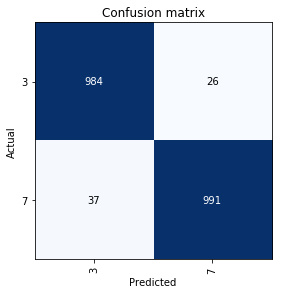

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
show_doc(ClassificationInterpretation.confusion_matrix)

<h4 id="ClassificationInterpretation.confusion_matrix" class="doc_header"><code>confusion_matrix</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L149" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ClassificationInterpretation-confusion_matrix-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>confusion_matrix</code>(**`slice_size`**:`int`=***`1`***)

<div class="collapse" id="ClassificationInterpretation-confusion_matrix-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ClassificationInterpretation-confusion_matrix-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>confusion_matrix</code>:</p><ul><li><code>pytest -sv tests/test_tabular_train.py::test_confusion_tabular</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_tabular_train.py#L84" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>confusion_matrix</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_train.py::test_ClassificationInterpretation</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L95" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Confusion matrix as an `np.ndarray`.  

In [ ]:
interp.confusion_matrix()

array([[984,  26],
       [ 37, 991]])

In [ ]:
show_doc(ClassificationInterpretation.most_confused)

<h4 id="ClassificationInterpretation.most_confused" class="doc_header"><code>most_confused</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L186" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ClassificationInterpretation-most_confused-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>most_confused</code>(**`min_val`**:`int`=***`1`***, **`slice_size`**:`int`=***`1`***) → `Collection`\[`Tuple`\[`str`, `str`, `int`\]\]

<div class="collapse" id="ClassificationInterpretation-most_confused-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ClassificationInterpretation-most_confused-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>most_confused</code>:</p><p>Some other tests where <code>most_confused</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_train.py::test_ClassificationInterpretation</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L95" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Sorted descending list of largest non-diagonal entries of confusion matrix, presented as actual, predicted, number of occurrences.  

#### Working with large datasets

When working with large datasets, memory problems can arise when computing the confusion matrix. For example, an error can look like this:

    RuntimeError: $ Torch: not enough memory: you tried to allocate 64GB. Buy new RAM!

In this case it is possible to force [`ClassificationInterpretation`](/train.html#ClassificationInterpretation) to compute the confusion matrix for data slices and then aggregate the result by specifying slice_size parameter. 

In [ ]:
interp.confusion_matrix(slice_size=10)

array([[984,  26],
       [ 37, 991]])

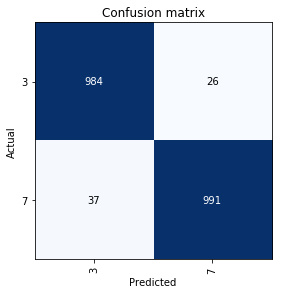

In [ ]:
interp.plot_confusion_matrix(slice_size=10)

In [ ]:
interp.most_confused(slice_size=10)

[('7', '3', 37), ('3', '7', 26)]

## Additional callbacks

We'll show examples below using our MNIST sample. As usual the `on_something` methods are directly called by the fastai library, no need to call them yourself.

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)

In [ ]:
show_doc(ShowGraph, title_level=3)

<h3 id="ShowGraph" class="doc_header"><code>class</code> <code>ShowGraph</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L64" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ShowGraph-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>ShowGraph</code>(**`learn`**) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

<div class="collapse" id="ShowGraph-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ShowGraph-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>ShowGraph</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Update a graph of learner stats and metrics after each epoch.  

```python
learn = cnn_learner(data, models.resnet18, metrics=accuracy, callback_fns=ShowGraph)
learn.fit(3)
```

![Training graph](imgs/train_graph.gif)

In [ ]:
show_doc(ShowGraph.on_epoch_end)

<h4 id="ShowGraph.on_epoch_end" class="doc_header"><code>on_epoch_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L66" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ShowGraph-on_epoch_end-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_epoch_end</code>(**`n_epochs`**:`int`, **`last_metrics`**:`MetricsList`, **\*\*`kwargs`**) → `bool`

<div class="collapse" id="ShowGraph-on_epoch_end-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ShowGraph-on_epoch_end-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_epoch_end</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

If we have `last_metrics` plot them in our pbar graph  

In [ ]:
show_doc(GradientClipping)

<h2 id="GradientClipping" class="doc_header"><code>class</code> <code>GradientClipping</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L83" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#GradientClipping-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>GradientClipping</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`clip`**:`float`=***`0.0`***) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

<div class="collapse" id="GradientClipping-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#GradientClipping-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>GradientClipping</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Gradient clipping during training.  

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy,
    callback_fns=partial(GradientClipping, clip=0.1))
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.140471,0.079571,0.971541,00:08


In [ ]:
show_doc(GradientClipping.on_backward_end)

<h4 id="GradientClipping.on_backward_end" class="doc_header"><code>on_backward_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L89" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#GradientClipping-on_backward_end-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_backward_end</code>(**\*\*`kwargs`**)

<div class="collapse" id="GradientClipping-on_backward_end-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#GradientClipping-on_backward_end-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_backward_end</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Clip the gradient before the optimizer step.  

In [ ]:
show_doc(BnFreeze)

<h2 id="BnFreeze" class="doc_header"><code>class</code> <code>BnFreeze</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L77" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#BnFreeze-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>BnFreeze</code>(**`learn`**) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

<div class="collapse" id="BnFreeze-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#BnFreeze-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>BnFreeze</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Freeze moving average statistics in all non-trainable batchnorm layers.  

For batchnorm layers where `requires_grad==False`, you generally don't want to update their moving average statistics, in order to avoid the model's statistics getting out of sync with its pre-trained weights. You can add this callback to automate this freezing of statistics (internally, it calls `eval` on these layers).

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, callback_fns=BnFreeze)
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.147409,0.081370,0.972031,00:05


In [ ]:
show_doc(BnFreeze.on_epoch_begin)

<h4 id="BnFreeze.on_epoch_begin" class="doc_header"><code>on_epoch_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L79" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#BnFreeze-on_epoch_begin-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_epoch_begin</code>(**\*\*`kwargs`**:`Any`)

<div class="collapse" id="BnFreeze-on_epoch_begin-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#BnFreeze-on_epoch_begin-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_epoch_begin</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Put bn layers in eval mode just after `model.train()`.  

In [ ]:
show_doc(AccumulateScheduler)

<h2 id="AccumulateScheduler" class="doc_header"><code>class</code> <code>AccumulateScheduler</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L99" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#AccumulateScheduler-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>AccumulateScheduler</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`n_step`**:`int`=***`1`***, **`drop_last`**:`bool`=***`False`***) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

<div class="collapse" id="AccumulateScheduler-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#AccumulateScheduler-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>AccumulateScheduler</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Does accumlated step every nth step by accumulating gradients  

Let's force `batch_size=2` to mimic a scenario where we can't fit enough batch samples to our memory. We can then set `n_step` as desired to have an effective batch_size of `effective_batch_size=batch_size*n_step`.

It is also important to use loss func with `reduce='sum'` in order to calculate exact average accumulated gradients.

Another important note for users is that `batchnorm` is not yet adapted to accumulated gradients. So you should use this callback at your own risk until a hero fixes it :)

Here we demonstrate this callback with a model without `batchnorm` layers, alternatively you can use `nn.InstanceNorm` or [`nn.GroupNorm`](https://pytorch.org/docs/stable/nn.html#torch.nn.GroupNorm).

```
from torchvision.models import vgg11

data = ImageDataBunch.from_folder(path, bs=2)

learn = cnn_learner(data, resnet18, metrics=accuracy, loss_func=CrossEntropyFlat(reduction='sum'),
                    callback_fns=partial(AccumulateScheduler, n_step=16))
learn.fit(1)
```

## Undocumented Methods - Methods moved below this line will intentionally be hidden

## New Methods - Please document or move to the undocumented section

In [ ]:
show_doc(ClassificationInterpretation.plot_top_losses)

<h4 id="_cl_int_plot_top_losses" class="doc_header"><code>_cl_int_plot_top_losses</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/learner.py#L135" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#_cl_int_plot_top_losses-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>_cl_int_plot_top_losses</code>(**`k`**, **`largest`**=***`True`***, **`figsize`**=***`(12, 12)`***, **`heatmap`**:`bool`=***`None`***, **`heatmap_thresh`**:`int`=***`16`***, **`return_fig`**:`bool`=***`None`***) → `Optional`\[`Figure`\]

<div class="collapse" id="_cl_int_plot_top_losses-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#_cl_int_plot_top_losses-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>_cl_int_plot_top_losses</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.  

In [ ]:
show_doc(ClassificationInterpretation.from_learner)

<h4 id="_cl_int_from_learner" class="doc_header"><code>_cl_int_from_learner</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/learner.py#L125" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#_cl_int_from_learner-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>_cl_int_from_learner</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`ds_type`**:[`DatasetType`](/basic_data.html#DatasetType)=***`<DatasetType.Valid: 2>`***, **`tta`**=***`False`***)

<div class="collapse" id="_cl_int_from_learner-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#_cl_int_from_learner-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>_cl_int_from_learner</code>:</p><ul><li><code>pytest -sv tests/test_vision_train.py::test_interp</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L72" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Create an instance of [`ClassificationInterpretation`](/train.html#ClassificationInterpretation). `tta` indicates if we want to use Test Time Augmentation.  

In [ ]:
show_doc(ClassificationInterpretation.top_losses)

<h4 id="ClassificationInterpretation.top_losses" class="doc_header"><code>top_losses</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L194" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ClassificationInterpretation-top_losses-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>top_losses</code>(**`k`**:`int`=***`None`***, **`largest`**=***`True`***)

<div class="collapse" id="ClassificationInterpretation-top_losses-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ClassificationInterpretation-top_losses-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>top_losses</code>:</p><p>Some other tests where <code>top_losses</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_train.py::test_interp</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L72" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_train.py::test_interp_shortcut</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L78" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

`k` largest(/smallest) losses and indexes, defaulting to all losses (sorted by `largest`).  

In [ ]:
show_doc(ClassificationInterpretation.confusion_matrix)

<h4 id="ClassificationInterpretation.confusion_matrix" class="doc_header"><code>confusion_matrix</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L149" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ClassificationInterpretation-confusion_matrix-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>confusion_matrix</code>(**`slice_size`**:`int`=***`1`***)

<div class="collapse" id="ClassificationInterpretation-confusion_matrix-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ClassificationInterpretation-confusion_matrix-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>confusion_matrix</code>:</p><ul><li><code>pytest -sv tests/test_tabular_train.py::test_confusion_tabular</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_tabular_train.py#L84" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>confusion_matrix</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_train.py::test_ClassificationInterpretation</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L95" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Confusion matrix as an `np.ndarray`.  

In [ ]:
show_doc(ClassificationInterpretation.most_confused)

<h4 id="ClassificationInterpretation.most_confused" class="doc_header"><code>most_confused</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L186" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ClassificationInterpretation-most_confused-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>most_confused</code>(**`min_val`**:`int`=***`1`***, **`slice_size`**:`int`=***`1`***) → `Collection`\[`Tuple`\[`str`, `str`, `int`\]\]

<div class="collapse" id="ClassificationInterpretation-most_confused-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ClassificationInterpretation-most_confused-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>most_confused</code>:</p><p>Some other tests where <code>most_confused</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_train.py::test_ClassificationInterpretation</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L95" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Sorted descending list of largest non-diagonal entries of confusion matrix, presented as actual, predicted, number of occurrences.  

In [ ]:
show_doc(ClassificationInterpretation.plot_confusion_matrix)

<h4 id="ClassificationInterpretation.plot_confusion_matrix" class="doc_header"><code>plot_confusion_matrix</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L161" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ClassificationInterpretation-plot_confusion_matrix-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>plot_confusion_matrix</code>(**`normalize`**:`bool`=***`False`***, **`title`**:`str`=***`'Confusion matrix'`***, **`cmap`**:`Any`=***`'Blues'`***, **`slice_size`**:`int`=***`1`***, **`norm_dec`**:`int`=***`2`***, **`plot_txt`**:`bool`=***`True`***, **`return_fig`**:`bool`=***`None`***, **\*\*`kwargs`**) → `Optional`\[`Figure`\]

<div class="collapse" id="ClassificationInterpretation-plot_confusion_matrix-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ClassificationInterpretation-plot_confusion_matrix-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>plot_confusion_matrix</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Plot the confusion matrix, with `title` and using `cmap`.  

In [ ]:
show_doc(ClassificationInterpretation.plot_multi_top_losses)

<h4 id="_cl_int_plot_multi_top_losses" class="doc_header"><code>_cl_int_plot_multi_top_losses</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/learner.py#L167" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#_cl_int_plot_multi_top_losses-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>_cl_int_plot_multi_top_losses</code>(**`samples`**:`int`=***`3`***, **`figsize`**:`Tuple`\[`int`, `int`\]=***`(8, 8)`***, **`save_misclassified`**:`bool`=***`False`***)

<div class="collapse" id="_cl_int_plot_multi_top_losses-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#_cl_int_plot_multi_top_losses-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>_cl_int_plot_multi_top_losses</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Show images in `top_losses` along with their prediction, actual, loss, and probability of predicted class in a multilabeled dataset.  